In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn import pipeline
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("sh_data.csv")

In [4]:
df

,Unnamed: 0,Text,Language
0,1269,ನಾನು ಹೋಗಬೇಕಾಗಿದೆ.,Kannada
1,1953,"4, 5. అభిషిక్త క్రైస్తవులు 1919 మొదలుకొని ఏ పన...",Telugu
2,1138,ಆದ್ದರಿಂದ ನೀವು ಯಾರನ್ನಾದರೂ ಭೇಟಿಯಾಗುತ್ತೀರಿ ಮತ್ತು ...,Kannada
3,989,மக்களுக்கு நன்றி.,Tamil
4,1085,ಕೆಲವು ಸಾಮಾನ್ಯ ತಪ್ಪು ಮಾಡುವ ಬಗ್ಗೆ ಮಾತನಾಡಲು ಕೆಲವೊ...,Kannada
...,...,...,...
2027,994,அது ஒன்றும் இல்லை.,Tamil
2028,754,நாங்கள் மிகவும் உற்சாகமாக இருக்கிறோம்.,Tamil
2029,1830,మార్పులు తప్పవా ?,Telugu
2030,98,"പറയിപെറ്റ പന്തിരുകുലം, ഇബ്സൻ, തുടങ്ങിയ ലേഖനങ്ങ...",Malayalam


In [5]:
df["Language"].value_counts()

Telugu       600
Malayalam    594
Tamil        469
Kannada      369
Name: Language, dtype: int64

In [19]:
#filepath = "train_te.txt" 

In [36]:
file = open("train_te.txt", encoding="utf8")
with file as file_in:
    lines = []
    for line in file_in:
        lines.append(line)

In [37]:
lines

['మళ్లీ ఉదయిస్తాడు.\n',
 'యెహోవా కృపను మనమెలా మహిమపరచవచ్చు?\n',
 'ఆర్థికంగా కూడా భారత్\u200c వే గంగా పయనిస్తున్నది.\n',
 '‘విద్యార్థులను చూస్తుంటే నాకు చిన్నప్పటి రోజులు గుర్తుకొస్తున్నాయి.\n',
 'ఆర్థిక లావాదేవీలన్నీ ఆన్\u200cలైన్\u200cలోనే\n',
 'పద్మినీ స్త్రీ రాత్రి వేళల్లో రతికి ఇష్టపడదు.\n',
 'ఓకే కుటుంబానికి చెందిన ముగ్గురు మృతిచెందటంతో ఈ సంఘటన కలవరపర్చింది.\n',
 'ఆ సినిమాకు వి. వి. వినాయక్\u200c దర్శకత్వం వహించనున్నారు.\n',
 'హైదరాబాద్\u200cకు మరో భారీ వర్షం సూచనలున్నాయని వాతావరణ శాఖ హెచ్చరించింది.\n',
 'మనం అంటున్న మమ్ముట్టి ఫ్యామిలీ !\n',
 'ఈ స్థితిలోనే కోకాకోలాకు రూ.\n',
 'సామెత ఏమిటి?\n',
 'మొనాకో-విల్లెలో, ఫ్రెంచ్, మోనెగస్క్యూ రెండింటిలో వీధి చిహ్నాలను ప్రింట్ చేస్తారు.\n',
 'ప్రముఖ బీబీసీ నివేదిక ఇదే విషయం పేర్కొంది.\n',
 "'ఎవరు మీరు' అన్నాను.\n",
 'సంవత్సరానికి అదనంగా ఒక రోజునో లేక ఒక నెలనో చేర్చి ఈ తేడాను నివారించవచ్చు.\n',
 'వీరి మరణానికి సంబంధించి పూర్తి వివరాలు ఇంకా తెలియాల్సి ఉంది.\n',
 'రథము వెడలె .\n',
 'ఆల్ ది బెస్ట్\u200c”అని అన్నారు.\n',
 'ఏంటిది చిన్న పిల్లాడిలా

In [40]:
df1 = pd.DataFrame(lines, columns =["Text"])

In [43]:
df1

,Text
0,మళ్లీ ఉదయిస్తాడు.\n
1,యెహోవా కృపను మనమెలా మహిమపరచవచ్చు?\n
2,ఆర్థికంగా కూడా భారత్‌ వే గంగా పయనిస్తున్నది.\n
3,‘విద్యార్థులను చూస్తుంటే నాకు చిన్నప్పటి రోజుల...
4,ఆర్థిక లావాదేవీలన్నీ ఆన్‌లైన్‌లోనే\n
...,...
4775511,నియాన్ లో కొన్ని వేర్వేరు ద్రవ్యరాశులు కలిగిన ...
4775512,అక్క‌డ వారికి ప‌ని కూడా ఇప్పించారు.\n
4775513,ఫోన్ ఇన్‌కమింగ్ కాల్స్ ఉచితం.\n
4775514,"దీనికి తోడు, ఆరోగ్య మంత్రి యొక్క కేన్స‌ర్‌ రోగ..."


In [45]:
lines[0].replace("\n","")

'మళ్లీ ఉదయిస్తాడు.'

In [48]:
lines[0] = lines[0].replace("\n","")

In [51]:
for line in lines:
    line = line.replace("\n","")

In [53]:
lines[0]

'మళ్లీ ఉదయిస్తాడు.'

In [55]:
for i in range(len(lines)):
    lines[i] = lines[i].replace("\n","")

In [56]:
lines[2]

'ఆర్థికంగా కూడా భారత్\u200c వే గంగా పయనిస్తున్నది.'

In [57]:
df1 = pd.DataFrame(lines, columns =["Text"])

In [58]:
df1

,Text
0,మళ్లీ ఉదయిస్తాడు.
1,యెహోవా కృపను మనమెలా మహిమపరచవచ్చు?
2,ఆర్థికంగా కూడా భారత్‌ వే గంగా పయనిస్తున్నది.
3,‘విద్యార్థులను చూస్తుంటే నాకు చిన్నప్పటి రోజుల...
4,ఆర్థిక లావాదేవీలన్నీ ఆన్‌లైన్‌లోనే
...,...
4775511,నియాన్ లో కొన్ని వేర్వేరు ద్రవ్యరాశులు కలిగిన ...
4775512,అక్క‌డ వారికి ప‌ని కూడా ఇప్పించారు.
4775513,ఫోన్ ఇన్‌కమింగ్ కాల్స్ ఉచితం.
4775514,"దీనికి తోడు, ఆరోగ్య మంత్రి యొక్క కేన్స‌ర్‌ రోగ..."


In [62]:
df1["Language"] = 'Telugu'

In [3]:
#data
data = pd.read_csv("file_name.csv")
data

,Text,Language
0,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam
1,ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...,Malayalam
2,മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...,Malayalam
3,അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...,Malayalam
4,പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...,Malayalam
...,...,...
2027,ఇప్పుడూ సాగుతున్నాయి.,Telugu
2028,కానీ అతడు సరిగ్గా వినియోగించుకోలేదు.,Telugu
2029,స్థానికులు తీవ్ర భయభ్రాంతులకు లోనయ్యారు.,Telugu
2030,అంతేకాకుండా వివిధ రకాల ప్రయోజనాలు అందుకుంటారు.,Telugu


In [4]:
#ALREADY RAN AND RECEIVED SHUFFLED DATASET AND SAVED BELOW:
data = data.sample(frac = 1)
data

,Text,Language
1269,ನಾನು ಹೋಗಬೇಕಾಗಿದೆ.,Kannada
1953,"4, 5. అభిషిక్త క్రైస్తవులు 1919 మొదలుకొని ఏ పన...",Telugu
1138,ಆದ್ದರಿಂದ ನೀವು ಯಾರನ್ನಾದರೂ ಭೇಟಿಯಾಗುತ್ತೀರಿ ಮತ್ತು ...,Kannada
989,மக்களுக்கு நன்றி.,Tamil
1085,ಕೆಲವು ಸಾಮಾನ್ಯ ತಪ್ಪು ಮಾಡುವ ಬಗ್ಗೆ ಮಾತನಾಡಲು ಕೆಲವೊ...,Kannada
...,...,...
994,அது ஒன்றும் இல்லை.,Tamil
754,நாங்கள் மிகவும் உற்சாகமாக இருக்கிறோம்.,Tamil
1830,మార్పులు తప్పవా ?,Telugu
98,"പറയിപെറ്റ പന്തിരുകുലം, ഇബ്സൻ, തുടങ്ങിയ ലേഖനങ്ങ...",Malayalam


In [24]:
#ALREADY SHUFFLED DATASET IS SAVED AS SH_DATA DON'T RUN ABOVE AND THIS MODULE 
#AGAIN
data.to_csv('sh_data.csv')

In [6]:
data1 = pd.read_csv("sh_data.csv")

In [7]:
data1["Language"].value_counts()

Telugu       600
Malayalam    594
Tamil        469
Kannada      369
Name: Language, dtype: int64

In [8]:
X = data1["Text"]
y = data1["Language"]

In [9]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
data_list = []
# iterating through all the text
for text in X:
    
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [11]:
#from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(2032, 2735)

In [12]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
#from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9852579852579852


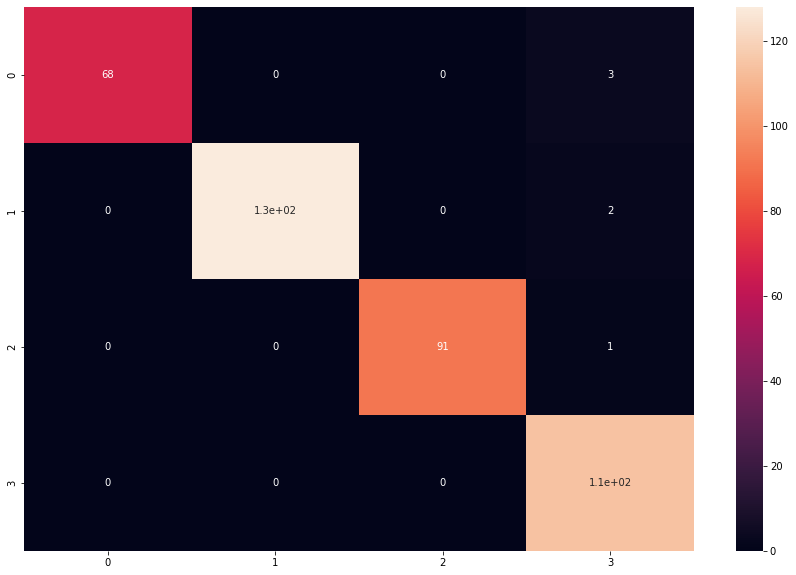

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       1.00      0.98      0.99       130
           2       1.00      0.99      0.99        92
           3       0.95      1.00      0.97       114

    accuracy                           0.99       407
   macro avg       0.99      0.98      0.98       407
weighted avg       0.99      0.99      0.99       407



In [18]:
def prediction(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language
     return text

In [19]:
la = prediction("సమానులును నగుదురు. వారు వివేచన-అంతఃకరణ") #Telugu

The langauge is in Telugu


In [20]:
la = prediction("ಬೆಳಗ್ಗೆ") #Kannada #Morning

The langauge is in Kannada


In [21]:
la = prediction("உங்களை சந்தித்ததில் மகிழ்ச்சி") #tamil #Nice to meet you.

The langauge is in Tamil


In [22]:
la = prediction("ഇന്ന് നിങ്ങൾക്കെങ്ങനെയുണ്ട്") #Malayalam #How are you doing today

The langauge is in Malayalam


In [27]:
from sklearn import svm

In [28]:
clf = svm.SVC(kernel='linear')

In [30]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [32]:
y_pred = clf.predict(x_test)

In [33]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9582309582309583


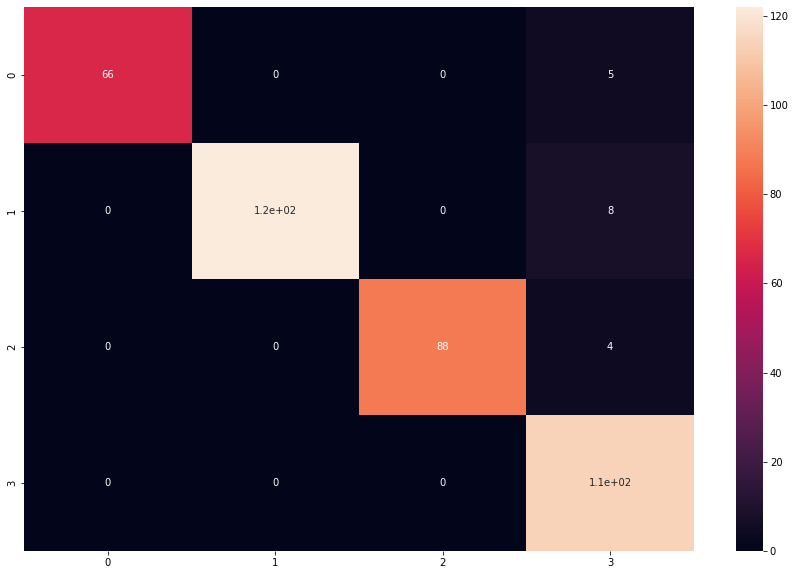

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        71
           1       1.00      0.94      0.97       130
           2       1.00      0.96      0.98        92
           3       0.87      1.00      0.93       114

    accuracy                           0.96       407
   macro avg       0.97      0.96      0.96       407
weighted avg       0.96      0.96      0.96       407



In [36]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MNb', MultinomialNB()))

SyntaxError: unexpected EOF while parsing (2607465467.py, line 8)

In [24]:
from googletrans import Translator, constants

In [25]:
t = Translator()

In [26]:
ex = t.translate(la,dest = 'en')
print("O:",ex.origin," and t: ",ex.text)

AttributeError: 'NoneType' object has no attribute 'group'